# Project: Medical Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>




<a id='intro'></a>
## Introduction

In this project, I will be analysing data related to the medical appointments of patients. The information in this dataset was collected from over 100,000 medical appointments in Brazil

I will be investigating questions related to how patients showed up for their medical appointments. I will find how patients who showed up for their appointments differ from patients who didn't.

In [223]:
# Import all libraries needed for the data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [224]:
# Read in the dataset and display first five rows
df = pd.read_csv("no_show_appointment.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [225]:
# Check table rows and columns
df.shape

(110527, 14)

In [226]:
# The dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB




### Data Cleaning



The ScheduledDay and AppointmentDay columns contains date values but they are contained in string datatype rather than datetime datatype.

I will be converting them to datetime datatype in the next codes so they will be fit for analysis.

In [227]:
# convert ScheduledDay and AppointmentDay columns to datetime.
#   First print out the two columns to be converted to datetime.
cols =df.columns[3:5]
cols

Index(['ScheduledDay', 'AppointmentDay'], dtype='object')

In [228]:
# Convert the two columns to datetime
df[cols] = df[cols].apply(pd.to_datetime)

In [229]:
# Check dataset information to confirm change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       


<a id='waiting_time'></a>
### Note:
Since I have converted ScheduledDay and AppointmentDay column to datetime datatype in the preceeding cells, I will be using both columns to determine the elapsed time.
I will name the elapsed time waiting_time and create it in the dataframe.
This will be useful in data exploration.

waiting_time is the time difference between the time the patients booked an appointment with the doctor and the time the patients should see the doctor. 
The waiting time may be be within hours, days and even weeks or months.

In [230]:
# Calculate waiting time for ScheduledDay and AppointmentDay column
#   Waiting time = AppointmentDay - ScheduledDay

df["waiting_time"] = df["AppointmentDay"] - df["ScheduledDay"]

In [231]:
# Print dataframe to confirm waiting_time column has been created in the dataframe.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_time
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37


### Note:

Oops! The waiting_time column was created at the end of the dataframe. I would want this to appear just 
after the ScheduledDay and AppointmentDay column for easy access and consistency.

Now, I will move the waiting_time column to the position following ScheduledDay and AppointmentDay.
This position is at column index 5. 
What that meant is that I will be moving the waiting_time column to the 5th index.

I will achieve this in two steps:

First, I will remove the waiting_time column from the dataframe and store it in a variable named save_data.

Secondly, I will insert the content of the save_column variable into the dataframe at column undex 5.

### Warning!

 _If the codes in the next cell throws an error, This is because when the code is run the first time. The waiting_time data is  popped out from the dataframe.  At second running of the code, The program will not find any waiting_time data to pop out. hence, the reason it throws an error._
 
 _Similar situation occurs in the second cell, it may throw an error at second run.
  If you run into this issue, rerun the code <a href="#waiting_time">**here**</a>. That's the code where the waiting time column      was created. You can also scroll up to run it._

In [232]:
# First remove the waiting_time column and save in save_data variable

save_data = df.pop("waiting_time") 


In [233]:
# Now, insert the waiting_time column in column 5
df.insert(5, "waiting_time", save_data)

In [234]:
# Check  information to confirm new update to the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   waiting_time    110527 non-null  timedelta64[ns]    
 6   Age             110527 non-null  int64              
 7   Neighbourhood   110527 non-null  object             
 8   Scholarship     110527 non-null  int64              
 9   Hipertension    110527 non-null  int64              
 10  Diabetes        110527 non-null  int64              
 11  Alcoholism      110527 non-null  int64              
 12  Handcap         110527 non-null  int64              
 13  SMS_received  

In [235]:
# print first five rows to re-confirm.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,waiting_time,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,-1 days +05:21:52,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,-1 days +07:51:33,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,-1 days +07:40:56,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,-1 days +06:30:29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,-1 days +07:52:37,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Note: 

I observe that the waiting_time column has negative values. This occured because the scheduledDay date is greater than the AppointmentDay date.
It should be otherwise. Since the patient can only have an appointment day after he had scheduled an appointment with the doctor, the scheduled day should not be larger than the appointment day. I am assuming the negative values seen in the waiting_time column must have been an error from either the scheduledDay and AppointmentDay column.

Hence, I will be dropping the rows with negative waiting_time in the next set of codes.

### Note:

After trying to drop rows with negative waiting_time values, It threw up an error. 

This is because the waiting_time column is a timedelta datatype. It's not possible to perform a boolean operation with the timedelta value with an integer value.

To solve this problem, I'll create a new column called waiting_hour. The waiting_hour will be a numeric conversion of the waiting_time column.
 
Creating a numeric type of the waiting_time column will also help in the data exploration stage when I will show the distribution of the patients' waiting time on a histogram.

That's because the waiting_time timedelta datatype is not compatible for plotting histogram.

In the next code, I will be using **Numpy** timedelta64 with astype() method to convert waiting_time to hours.

The waiting_hour column will make it convenient to perform boolean operation in order to filter out the data with negative waiting time values.

In [236]:
# df.drop("waiting_hour", axis =1, inplace=True)  # Only remove comment if you run into an error after running the next cell.

# Note that timedelta64 is a Numpy function but I don't have to import the numpy library directly because
# It's now compatible with pandas.

waiting_hour = df["waiting_time"].astype("timedelta64[h]")
waiting_hour

0         -19.0
1         -17.0
2         -17.0
3         -18.0
4         -17.0
          ...  
110522    830.0
110523    832.0
110524    967.0
110525    968.0
110526    970.0
Name: waiting_time, Length: 110527, dtype: float64

### Warning!

You may run into an error if the code in the following cell is run more than once.
I explained the reason for this earlier.
To solve this issue, I added a code to drop the waiting_hour column in  the first line of the preceeding cell. Remove the comment and run the code. 
Then return to the next cell to rerun. It should work fine.

In [237]:
# Insert the previously created waiting_hour variable into the datframe at position 6 
df.insert(6, "waiting_hour", waiting_hour)

In [238]:
# Print first five rows to confirm update.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,waiting_time,waiting_hour,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,-1 days +05:21:52,-19.0,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,-1 days +07:51:33,-17.0,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,-1 days +07:40:56,-17.0,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,-1 days +06:30:29,-18.0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,-1 days +07:52:37,-17.0,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Note:

Next, I will filter out the column with negative waiting_hour values in the next cell.
I decide to perform the filtering directly without using the drop() function or the pandas query function.
The pandas query function once gave me an hard time when I performed an initial filtering operation with the No-show column.
I later found out it was the hyphen in "No-show" column label that caused the issue.
To avoid issues like this, I will not be using the pandas query function for filtering in this project.

In [239]:
# Filter out all rows rows with negative waiting hour values 
#  by extrating out column with positive waiting hour. 
df["waiting_hour"] > 0


0         False
1         False
2         False
3         False
4         False
          ...  
110522     True
110523     True
110524     True
110525     True
110526     True
Name: waiting_hour, Length: 110527, dtype: bool

In [240]:
# Now take the dataframe with positive waiting hour values and replace the previous dataframe 
#  named df with the content by storing it in df.
 
df = df[df["waiting_hour"] > 0]


In [241]:
# Take a look at the first five rows of the new dataframe.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,waiting_time,waiting_hour,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,1 days 15:23:09,39.0,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,1 days 08:54:48,32.0,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,1 days 08:20:02,32.0,39,GOIABEIRAS,0,0,0,0,0,0,Yes
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,1 days 11:11:35,35.0,19,CONQUISTA,0,0,0,0,0,0,No
10,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,1 days 09:01:49,33.0,30,NOVA PALESTINA,0,0,0,0,0,0,No


In [242]:
# Check information to confirm update.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71959 entries, 5 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   PatientId       71959 non-null  float64            
 1   AppointmentID   71959 non-null  int64              
 2   Gender          71959 non-null  object             
 3   ScheduledDay    71959 non-null  datetime64[ns, UTC]
 4   AppointmentDay  71959 non-null  datetime64[ns, UTC]
 5   waiting_time    71959 non-null  timedelta64[ns]    
 6   waiting_hour    71959 non-null  float64            
 7   Age             71959 non-null  int64              
 8   Neighbourhood   71959 non-null  object             
 9   Scholarship     71959 non-null  int64              
 10  Hipertension    71959 non-null  int64              
 11  Diabetes        71959 non-null  int64              
 12  Alcoholism      71959 non-null  int64              
 13  Handcap         71959 non-null

 ### Note:
 
 ### Fix No-show 
 
 Having solved the issues with the datetime columns and waiting_hour column, 
 I will move to the No-show column.
 
 

#### Note:

In the next set of codes, I will reverse the order of the No-show column.
Since "No" means the patient showed up and "Yes" means the patient didn't show up according to the dataset description. 
I will change all the values of "No" to 1 and all the values of "Yes" to 0 to make my analysis easier.

Simply put, 
1 will mean The patient showed up for their appointments.
0 will mean the patient didn't show up.

I will later rename the No-show column to show_up for easy description.

In [243]:
# Check the number of unique values in the No-show column before replacing the contents to 1 and 0
df["No-show"].value_counts()

No     51437
Yes    20522
Name: No-show, dtype: int64

In [244]:
# Replace all No to 1 and all Yes to 0

df.replace({"No-show": {"No": 1, "Yes":0}}, inplace=True)

In [245]:
# Print the first five rows to see the new update on No-show column
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,waiting_time,waiting_hour,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,1 days 15:23:09,39.0,76,REPÚBLICA,0,1,0,0,0,0,1
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,1 days 08:54:48,32.0,23,GOIABEIRAS,0,0,0,0,0,0,0
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,1 days 08:20:02,32.0,39,GOIABEIRAS,0,0,0,0,0,0,0
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,1 days 11:11:35,35.0,19,CONQUISTA,0,0,0,0,0,0,1
10,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,1 days 09:01:49,33.0,30,NOVA PALESTINA,0,0,0,0,0,0,1


In [246]:
#Check unique value again to confirm the unique values of 1 and 0 are equal to the unique value of No and Yes
df["No-show"].value_counts()

1    51437
0    20522
Name: No-show, dtype: int64

### Note:

#### Check the columns with binary data for inconsistencies.


From the previous result, I can see that the unique values of 1 and 0 are equal to the unique values of "No" and "Yes" respectively.
In the next sets of codes, I'll be checking the columns that contain binary data for any incorrect data to be cleaned.
A binary data is a data whose value is either 0 or 1.

Columns with binary data in this dataframe according to the dataset descriptions include : Scholarship, hypertension, Diabetes, Alcoholism, handicap, SMS_received and No-show.

Confirm if all the binary columns contain either 1 or 0 only by checking the unique values of each column.
I will drop all the rows with values other than 0 and 1


In [247]:
# Check unique values of free_health_care column
df["Scholarship"].value_counts()

0    65288
1     6671
Name: Scholarship, dtype: int64

In [248]:
# Check unique values of hypertension column
df["Hipertension"].value_counts()

0    56927
1    15032
Name: Hipertension, dtype: int64

In [249]:
# Check unique values of Diabetes column
df["Diabetes"].value_counts()

0    66582
1     5377
Name: Diabetes, dtype: int64

In [250]:
# Check unique values of Alcoholism column
df["Alcoholism"].value_counts()

0    70137
1     1822
Name: Alcoholism, dtype: int64

In [251]:
# Check unique values of SMS_received column
df["SMS_received"].value_counts()

0    36477
1    35482
Name: SMS_received, dtype: int64

In [252]:
# Check unique value of No-show column
df["No-show"].value_counts()

# No surprise, I replace all the values of "No" to 1 and all the values of "Yes" to 0 earlier on and
#  also checked the unique values previously.

1    51437
0    20522
Name: No-show, dtype: int64

In [253]:
#Check unique value of handicap column
df["Handcap"].value_counts()


0    70652
1     1185
2      112
3        8
4        2
Name: Handcap, dtype: int64

### Note:

After checking the unique values of handicap column. I can see there is a problem with the data. It should only contain 0 and 1 but it also contains 2, 3 and 4.
I assume this is an error. The column should only contain 0 and 1 since it's described as a binary data in the dataset description.

In the next two cells, I will perform operations to drop all rows that contains non-binary data, 2, 3 and 4.

In [254]:
#Check the rows that contains either one and zero
(df["Handcap"] == 1) | (df["Handcap"] == 0)

5         True
6         True
7         True
9         True
10        True
          ... 
110522    True
110523    True
110524    True
110525    True
110526    True
Name: Handcap, Length: 71959, dtype: bool

In [255]:
#Drop the rows with wrong values by extracting out the rows with 0 and 1
df = df[(df["Handcap"] == 1) | (df["Handcap"] == 0)]
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,waiting_time,waiting_hour,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,1 days 15:23:09,39.0,76,REPÚBLICA,0,1,0,0,0,0,1
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,1 days 08:54:48,32.0,23,GOIABEIRAS,0,0,0,0,0,0,0
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,1 days 08:20:02,32.0,39,GOIABEIRAS,0,0,0,0,0,0,0
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,1 days 11:11:35,35.0,19,CONQUISTA,0,0,0,0,0,0,1
10,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,1 days 09:01:49,33.0,30,NOVA PALESTINA,0,0,0,0,0,0,1


In [256]:
# check the unique values of handicap column to confirm if the column has been updated
df["Handcap"].value_counts()

0    70652
1     1185
Name: Handcap, dtype: int64

### Note:

Now that the issue with the column with the binary data has been fixed.
Next, I will use the describe() function to see if there is other problem with the numeric data.

In [257]:
# Use describe function to check if there is any other issues with the numeric data
df.describe()

,PatientId,AppointmentID,waiting_time,waiting_hour,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,7.183700e+04,7.183700e+04,71837,71837.000000,71837.000000,71837.000000,71837.000000,71837.000000,71837.000000,71837.000000,71837.000000,71837.000000
mean,1.452638e+14,5.655035e+06,15 days 03:54:46.714979745,363.409789,38.486504,0.092766,0.208486,0.074446,0.025266,0.016496,0.493269,0.714841
std,2.535796e+14,7.472260e+04,16 days 11:49:50.686647680,395.833126,22.916152,0.290106,0.406229,0.262498,0.156932,0.127373,0.499958,0.451493
min,3.921784e+04,5.030230e+06,0 days 03:16:20,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.967343e+12,5.617795e+06,3 days 15:15:05,87.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.988478e+13,5.661163e+06,8 days 16:26:21,208.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.372188e+13,5.707166e+06,21 days 15:04:47,519.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999320e+14,5.784985e+06,178 days 13:19:01,4285.000000,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Note:
I can see that the age column contain 0 value.
Can this be an error?

Or, can 0 be the age for under-one year old kids.

I will check the number of times 0 appears in the age column.

In [258]:
# Check the number of times 0 appear in the Age column.
(df["Age"] == 0).value_counts()

False    69706
True      2131
Name: Age, dtype: int64

In the previous cell, I see there are over 2000 values with patients with 0 values for their ages.
That's pretty much.

There is no description in the dataset on what 0 value means for age. There is no information as to whether the dataset contains children or young kids.
I will take the distribution of the ages of all the patients on histogram to see how much kids or under 18 appear in the dataset. 
If the number of times they appear is significant, I will take 0 values for under-one year old kids.

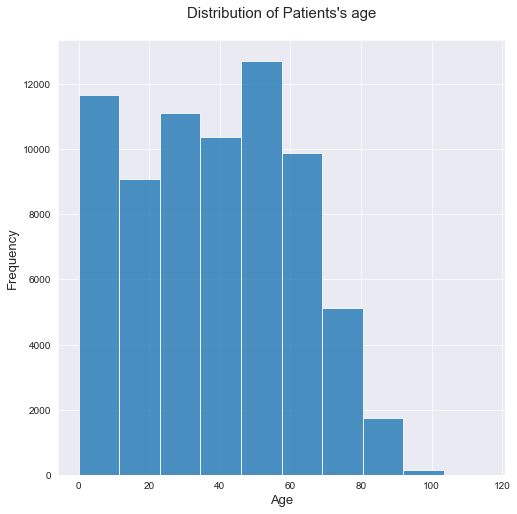

In [259]:
# Plot the distribution of the ages of patients on a histogram 
#  to see if the data contains a high number of children patients.

df["Age"].hist(figsize=(8,8), alpha=0.8)
plt.title("Distribution of Patients's age\n", fontsize=15)
plt.xlabel("Age", fontsize=13)
plt.ylabel("Frequency", fontsize=13);


### Note:

The distribution of patients' ages on the histogram plotted above  confirmed that the dataset contains the data of kids.
There are over 10,000 appearances of under 10 year old kids according to the histogram. That's over 14 percent of the dataset.

I can now confirm that children are part of the dataset.

Hence, I will be assuming that the 0 values are under one year old kids and retain them in the dataset.


### Note:

#### Drop Columns that will not be useful for this analysis.

Now that I'm done with the age column, I will drop all the columns that will not be useful for my analysis.
 
Columns such as PatientId and AppointmentID are data personal to the patient. I will drop them.
I will also drop the Neighbourhood column.
Since I already got the waiting time and waiting hour from the AppointmentDay and ScheduledDay. I will no longer be using the columns for my analysis. So, I'll drop them.

In [260]:
# Drop Columns that will not be used for the analysis.

df.drop(["PatientId", "ScheduledDay", "AppointmentDay", "AppointmentID", "Neighbourhood"], axis=1, inplace=True)



### Warning!

_Only run the previous cell once to avoid error._

_If it throws an error, you might have run it more than once. 
You might have to go run the cells from the <a href= "#wrangling">beginning</a>._

In [261]:
# Print first five rows to see the update on dataframe.
df.head()

,Gender,waiting_time,waiting_hour,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
5,F,1 days 15:23:09,39.0,76,0,1,0,0,0,0,1
6,F,1 days 08:54:48,32.0,23,0,0,0,0,0,0,0
7,F,1 days 08:20:02,32.0,39,0,0,0,0,0,0,0
9,F,1 days 11:11:35,35.0,19,0,0,0,0,0,0,1
10,F,1 days 09:01:49,33.0,30,0,0,0,0,0,0,1


In [262]:
# Check dataframe information to confirm reduced number of columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71837 entries, 5 to 110526
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   Gender        71837 non-null  object         
 1   waiting_time  71837 non-null  timedelta64[ns]
 2   waiting_hour  71837 non-null  float64        
 3   Age           71837 non-null  int64          
 4   Scholarship   71837 non-null  int64          
 5   Hipertension  71837 non-null  int64          
 6   Diabetes      71837 non-null  int64          
 7   Alcoholism    71837 non-null  int64          
 8   Handcap       71837 non-null  int64          
 9   SMS_received  71837 non-null  int64          
 10  No-show       71837 non-null  int64          
dtypes: float64(1), int64(8), object(1), timedelta64[ns](1)
memory usage: 6.6+ MB


### Note:

### Rename Column names.

After removing columns that will not be useful for my analysis.
I will first rename the "No-show" column names to "show_up" and the "SMS-received" column label to "reminder" for simplicity.
After, I will go ahead to change all the columns names case to lowercase for consistency.

In [271]:
#rename columns

df.rename(columns={ "SMS_received":"reminder", "Handcap":"handicap", "Hipertension":"hypertension", "Scholarship":"free_health_care", "No-show":"show_up"}, inplace=True)

In [272]:
# Check column names to confirm update
df.head()

,gender,waiting_time,waiting_hour,age,free_health_care,hypertension,diabetes,alcoholism,handicap,reminder,show_up
0,F,1 days 15:23:09,39.0,76,0,1,0,0,0,0,1
1,F,1 days 08:54:48,32.0,23,0,0,0,0,0,0,0
2,F,1 days 08:20:02,32.0,39,0,0,0,0,0,0,0
3,F,1 days 11:11:35,35.0,19,0,0,0,0,0,0,1
4,F,1 days 09:01:49,33.0,30,0,0,0,0,0,0,1


In [273]:
# Convert all column names to lowercase for consistency

df.columns = df.columns.str.lower()

In [274]:
# Check column names to confirm update
df.head()

,gender,waiting_time,waiting_hour,age,free_health_care,hypertension,diabetes,alcoholism,handicap,reminder,show_up
0,F,1 days 15:23:09,39.0,76,0,1,0,0,0,0,1
1,F,1 days 08:54:48,32.0,23,0,0,0,0,0,0,0
2,F,1 days 08:20:02,32.0,39,0,0,0,0,0,0,0
3,F,1 days 11:11:35,35.0,19,0,0,0,0,0,0,1
4,F,1 days 09:01:49,33.0,30,0,0,0,0,0,0,1


In [275]:
# Check dataframe information to confirm no errors were made.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71837 entries, 0 to 71836
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   gender            71837 non-null  object         
 1   waiting_time      71837 non-null  timedelta64[ns]
 2   waiting_hour      71837 non-null  float64        
 3   age               71837 non-null  int64          
 4   free_health_care  71837 non-null  int64          
 5   hypertension      71837 non-null  int64          
 6   diabetes          71837 non-null  int64          
 7   alcoholism        71837 non-null  int64          
 8   handicap          71837 non-null  int64          
 9   reminder          71837 non-null  int64          
 10  show_up           71837 non-null  int64          
dtypes: float64(1), int64(8), object(1), timedelta64[ns](1)
memory usage: 6.0+ MB


#### Note:
The above result shouldn't be showing 5 to 110526. Rather, it should show 0 to 71,836 entries.

The reason for this anomaly was that I have dropped some rows previously and their indexes have been dropped along with them. 

For instance, rows with row index 0 to 4 have been dropped. That's the reason the row index is starting from 5 rather than 0.

In the next cell, I  am going to reset all the row indexes in the dataset so it could start from 0 and end at 71,836 entries.

In [276]:
# Reset index so indexes could start from 0 and end at 71,836

df.reset_index(drop=True, inplace=True)

In [277]:
# show dataframe information to confirm update.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71837 entries, 0 to 71836
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   gender            71837 non-null  object         
 1   waiting_time      71837 non-null  timedelta64[ns]
 2   waiting_hour      71837 non-null  float64        
 3   age               71837 non-null  int64          
 4   free_health_care  71837 non-null  int64          
 5   hypertension      71837 non-null  int64          
 6   diabetes          71837 non-null  int64          
 7   alcoholism        71837 non-null  int64          
 8   handicap          71837 non-null  int64          
 9   reminder          71837 non-null  int64          
 10  show_up           71837 non-null  int64          
dtypes: float64(1), int64(8), object(1), timedelta64[ns](1)
memory usage: 6.0+ MB


In [278]:
# Print first five rows to confirm update on datafram.

df.head()

,gender,waiting_time,waiting_hour,age,free_health_care,hypertension,diabetes,alcoholism,handicap,reminder,show_up
0,F,1 days 15:23:09,39.0,76,0,1,0,0,0,0,1
1,F,1 days 08:54:48,32.0,23,0,0,0,0,0,0,0
2,F,1 days 08:20:02,32.0,39,0,0,0,0,0,0,0
3,F,1 days 11:11:35,35.0,19,0,0,0,0,0,0,1
4,F,1 days 09:01:49,33.0,30,0,0,0,0,0,0,1


### Note:

Now, that I'm done with data cleaning, I will define the column names before moving to data exploration

#### Definition of Columns:

The column names below are columns that contain binary data. They can only contain 1 or 0.
1 means True while 0 means False for the column.

**free_health_care:** patients who have access to free medical care. 

**hypertension:** patients suffering from hypertension.

**diabetes:** patients suffering from diabetes.

**alcoholism:** patients who have alcohol tendency.

**handicap:** patients suffering from handicapped.

**reminder** stands for whether the patients received a reminder or not.

**show_up** stands for whether the patients showed up or not for their appointments.


#### Other Columns:

**gender** It contains two data. "F" for female and "M" for male.

**age** contains the age of the patients.

**waiting_time:**  The time the patients waited. This is time between appointment day and scheduled day. waiting time is in days.

**waiting_hours:** The waiting time of the patients in hours.



<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1

### Does age affect the rate at which patients showed up for their appointments?

 ### Note:
 
 First, I will take a mask of those that showed up and those that didn't
 The mask will be useful for the analysis.
 
 It will enable me distinguish the data of patients that showed up from the data of patients that didn't.
 
 Note that I could replace show up with **present** and those that didn't show up with **absent** anywhere in this data  exploration.

In [279]:
# show represents the mask of those that showed up for their appointments.
show = df["show_up"] == 1

# not_show is a mask of those that didn't show up for their appointments.
not_show = df["show_up"] == 0

### Note: 

In the next cells, I will find the average age of patients that showed up for their appointments and patients that didn't.

I will then round the age to the nearest whole number using **Numpy** round().

In [280]:
# Average age of patients that showed up for their appointments.

show_avg_age = np.round(df["age"][show].mean())
show_avg_age

40.0

In [281]:
# Average age of patients that didn't showed up for their appointments.

NoShow_avg_age = np.round(df["age"][not_show].mean())
NoShow_avg_age

35.0

### Note:

In the preceeding cells,  I got the average age of patients that showed up for their appointments and those that didn't.

In the following cells, I will show the visualisation of the average age of patients on a bar chart.

I will be using the **Numpy** library to take an array of numbers to represent the x-axis.

Note that **Present** in the x-axis label represents patients that showed up for their appointments while **Absent** represents patients that didn't show up for their appointments.


In [282]:
# Variable holding the value of the base and height of the bar chart.
# Use the numpy library to take the array of numbers for the x-axis labels.

height = [show_avg_age, NoShow_avg_age]
base = np.arange(len(height))

# x-axis label
# present represents patients that showed up.
# absent represents patients that didn't show up.
label = ["Present", "Absent"]


### Note:
Much of the values that will be plotted on a bar chart in this analysis have closer values. 

It may be difficult to know the values of each bar on a bar chart because their values are close.

So, I have added a data label to make the values of the bars easier to read.
This means that each value of the bars will be placed on top of the bars.

In the cell below is a function that add data labels to the bar charts.

I will call this function from time to time when I'm in need of it to add data labels to bar charts.

I will also use other matplotlib method other than this function to add data labels to bar charts where appropriate.

In [283]:
# space is the distance between the bar and data label.
space = 1
#  Function to add data label to bar charts.
def addlabel(x,y):
    for i in x:
        plt.text(i, y[i]+ space, y[i], ha="center") # I added a space  to the y-coordinate to create a distance between the bar and the data label.

### Note:

In the following cell, I call the seaborn function to add a background colour to the charts.

Its effect will appear in  all the charts in this analysis.

In [284]:
# code to add background grid to charts
sns.set_style("darkgrid")

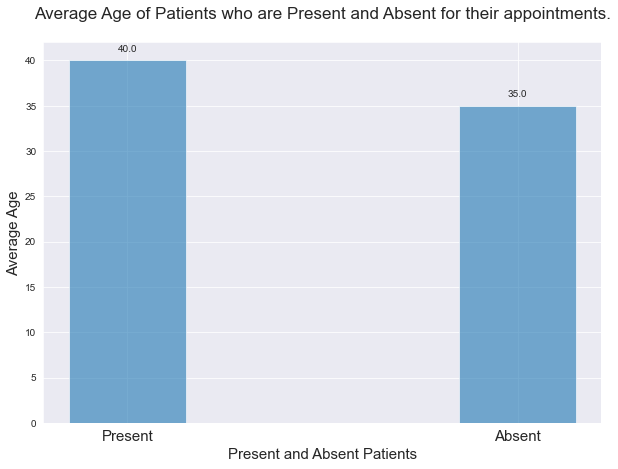

In [285]:
# Bar chart showing the average age of patients that showed up for their appointments.

# Size of the bar chart.
plt.figure(figsize=(10,7))

#  Plot the bar chart.
plt.bar(x= base, height= height, width=0.3, alpha= 0.6)

# Bar chart Title.
plt.title("Average Age of Patients who are Present and Absent for their appointments.\n", fontsize=17)

# Add ticks and labels to the bar chart.
plt.xlabel("Present and Absent Patients", fontsize=15)
plt.xticks(base, label, fontsize=15)
plt.ylabel("Average Age", fontsize=15);


# Call the function to add data label to the chart.
addlabel(base,height)

plt.show()

### Observation:

I observe from the above chart that the average age of those that showed up are 5 years higher than those that didn't.

In the following codes, I'll take the distribution of how the patients showed up in relative to their age on a histogram to further see if that is a strong correlation.

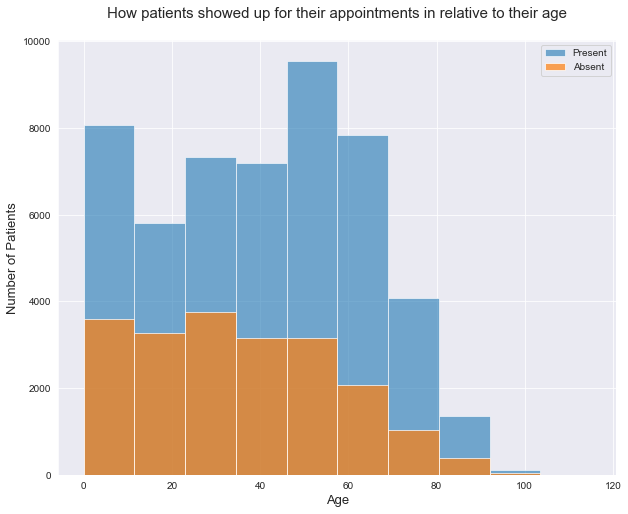

In [286]:
# The distribution of the ages of patients that are present for their appointments and those that are absent.

# Shape of histogram.
plt.figure(figsize= (10,8))

# Histogram of patients that were present for their appointments.
df["age"][show].hist(label = "Present", alpha = 0.6)

# Histogram of patients that were absent for their appointments.
df["age"][not_show].hist(label = "Absent", alpha = 0.7)

# Title and labels.
plt.title("How patients showed up for their appointments in relative to their age\n", fontsize=15)
plt.xlabel("Age", fontsize=13)
plt.ylabel("Number of Patients", fontsize=13)

# Display legend and display histogram.
plt.legend()
plt.show();

### Observation:

There is no significant difference in the age of patients that showed up for their appointment and those that didn't.

There are more younger folks under the age of 60 in the data.

More patients, both young and aged showed up for their appointments than those that didn't. 

### Research question 2

#### Did one gender show up for their appointments than the other?

In this section, I will be looking to know how patients showed up relative to their gender.

Are more male patients present at the hospital for their appointments than female patients?

I will explore this in this section.

### Note:

First, I will find the average rate of patients that showed up by their gender. 

Since the higher value of the show_up colum is one, the average value will be less than one. This means the average value can be expressed in percentage.

I will find the average percentage by multiplying the average by 100. I will then use numpy round() to round the percentage to two decimal places.

In [287]:
# Average of how both genders showed up for their appointments in percentage.

avg_gender = np.round(df.groupby("gender")["show_up"].mean() * 100, 2)
avg_gender

gender
F    71.57
M    71.32
Name: show_up, dtype: float64

### Note:

After finding the percentage average of male and female patients that showed up for their appointments.

I will go ahead to plot the values on a bar chart.

I will also call the addlabel(x,y) function written previously to add the percentage values on top of the bar chart.

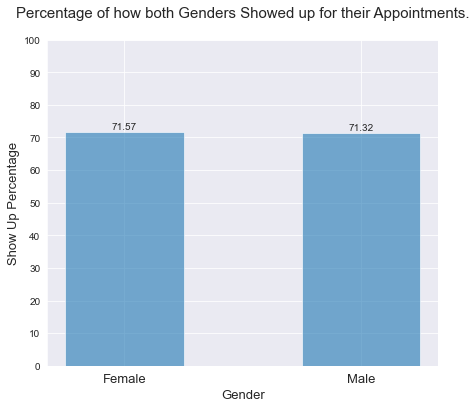

In [288]:
# A bar chart showing the percentage of how both gender showed up for their appointments.
# I will use the numpy library to take a range of values for the x-axis.


label = ["Female", "Male"]

# Numpy is used to get an array of a range of numbers for the x-axis.
base = np.arange(len(label))


# height is the tick value of the y axis.
height =  np.arange(0, 110, 10)

# Shape of the bar chart.
plt.figure(figsize=(7,6))

 # Plot a bar chart showing the Percentage average of patients that showed up according to their gender.
plt.bar(base, avg_gender, width=0.5, alpha=0.6)


# Title, ticks and labels.
plt.title("Percentage of how both Genders Showed up for their Appointments.\n", fontsize=15)
plt.xlabel("Gender", fontsize=13)
plt.ylabel("Show Up Percentage", fontsize=13)
plt.xticks(base, label, fontsize=13)
plt.yticks(height);

# Call function to add label to the bars.
addlabel(base, avg_gender)


# Display chart
plt.show()

#### Observation:
I can deduce from the previous codes and charts that 71.6% of the female showed up while 71.3% of the male showed up.

No significant difference between both male and female.
I can't find any correlation among both variables yet. I will explore more later.

### Research Question 3

#### Are patients absent for their appointments because they are not financially capable to pay their bills?




In this section, I will find out by exploratory data analysis  whether lack of access to free_health_care 
might be a reason patients miss thier appointments.

Please, note that free_health_care stands for patients who have access to free medical care.

I will find the average percentage of patients who either have access to free medical care or not and showed up for their appointments. 


I will also use **Numpy** round() function to round up the percentage value to two decimal places.

Lastly, I will show how both group differ on a bar chart.

In [289]:
#The average percentage of patients that showed up for their appointments among those who have access to free medical care 
# and those that pay their bills themselves.

free_health_care = np.round(df.groupby("free_health_care")["show_up"].mean() * 100, 2) # Numpy round() function to round to two decimal places.
free_health_care

free_health_care
0    72.15
1    65.01
Name: show_up, dtype: float64

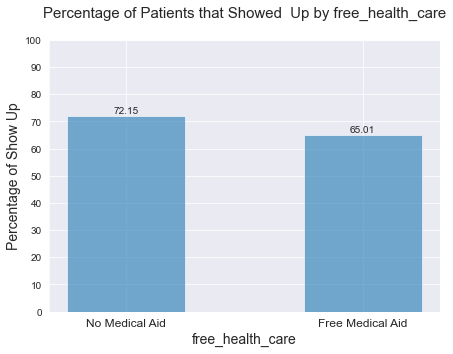

In [290]:
# A bar chart showing the percentage of patients that showed up among those who received free medical care 
#  and those that did not.

 # tick values of y axis.
ytick = np.arange(0, 110, 10)

# tick label of x-axis.
label = ["No Medical Aid", "Free Medical Aid"]

# tick value of x-axis
base = np.arange(len(label))

# shape of the bar chart.
plt.figure(figsize=(7,5))

# Plot bar chart
plt.bar(base, free_health_care, width=0.5, alpha=0.6)

# Bar chart title 
plt.title("Percentage of Patients that Showed  Up by free_health_care\n", fontsize=15)

# labels of x and y axis.
plt.xlabel("free_health_care", fontsize=14)
plt.ylabel("Percentage of Show Up", fontsize=14)

# x and y tick values.
plt.xticks(base, label, fontsize=12)
plt.yticks(ytick);

# Call function to add percentage values to the bars.
addlabel(base, free_health_care)

# Display chart.
plt.show()

#### Observation:

Patients who cater for their medical bills themselves showed up for their appointment 
more than patients whose medical bills are sponsored.

72 percent of patients who showed up for their appointments paid their bills themselves

65 percent of patients  who showed up received free medical care.

Lack of funds may not be the reason patients didn't show up for their appointments.
In fact, It appears those who pay for their medical care are more likely to show up for their appointments than those pay nothing. 7 percent more than those that receive free medical care. 

### Research Question 4


#### In this section, I will be taking a look at patients' ailments and how their ailments could affect how they showed up for their appointments.


How did patients' ailments  affect how they showed up for their appointments?

Did patients with certain  ailments care more about their health than those without?

Please, note that **"Positive"** values on the xtick labels of the charts represents patients suffering from the ailment.

While  **"Negative"** values on the xtick labels of the charts represents patients who have no such ailment.

#### Note:

In the next set of cells, I will be finding the percentages of patients suffering from a certain ailments and those that don't that showed up for thier appointments.

In [291]:
# Percentage average of patients with or without hypertension that showed up for their appointment
# Use Numpy round() function to round the  percentage values to two decimal places.

hypertension = np.round(df.groupby("hypertension")["show_up"].mean() *100, 2)
hypertension

hypertension
0    70.15
1    76.53
Name: show_up, dtype: float64

#### Observation:
I can deduce that 76 percent of patients suffering from hypertension showed up for their appointments while 70 percent of  patients without hypertension showed up for their appointments.

This means more patients suffering from hypertension showed up for their appointments than patient who has no hypertension.

Though by only 6% rate.

In [292]:
# Percentage of diabetic and non-diabetic patients that showed up for their appointment

# Use Numpy round() function  to provide a rounded percentage value of the average.

diabetes = np.round(df.groupby("diabetes")["show_up"].mean() * 100, 2)
diabetes

diabetes
0    71.20
1    75.06
Name: show_up, dtype: float64

#### Observation:

I observe that 75 percent of diabetic patients showed up for their appointments while 71 percent of non-diabetic patients showed up for their appointments.

This means more patients suffering from diabetes showed up for their appointments than patient who has no diabetes.

Though by only 4%.

In [293]:
# Percentage of patient with and without handicap that showed up and didn't show up for their appointment

# Use Numpy round() function  to provide a rounded percentage value of the average while multiplying by 100
handicap = np.round(df.groupby("handicap")["show_up"].mean() * 100, 2)
handicap

handicap
0    71.43
1    74.94
Name: show_up, dtype: float64

#### Observation:

74 percent of handicapped patients showed up for their appointments.
While 71 percent of non-handicapped patients showed up for their appointments.

This means more  handicapped patients showed up for their appointments than patients who are not handicapped.

Though, by only 3%.

In [294]:
# Average values of alcoholic and  non-alcoholic patients who showed up for their appointments.

# Use Numpy to provide a rounded percentage value to two decimal places.

alcoholism = np.round(df.groupby("alcoholism")["show_up"].mean() * 100, 2)
alcoholism

alcoholism
0    71.63
1    65.90
Name: show_up, dtype: float64

#### Observation:

About 66 percent of alcoholic patients showed up for their appointments.
While about 72 percent of non-alcoholic patients showed up for their appointments.

This means more non-alcoholic patients showed up for their appointments than patients who are alcoholic.

Though, by only 6%.

#### Note:

The codes in the cell below plots all the percentages of patients who showed up for their appointments on a bar chart.
It shows the distribution between how  these patients showed up and the kind of ailments they suffer from.

**Negative** means patients that did not have a certain ailment.

**Positive** means patients that are suffering from a certain ailment.

In [295]:
# Import numpy library to get the value of x-axis for the bar charts.

# tick values for x-axis for the bar charts.
bar = np.arange(len(hypertension))

# width of the bars.
width = 0.2

# label of x axis.
xlabel= ["Negative", "Positive"]

# tick values of y axis.
ytick  = np.arange(0,110, 10)   # I make the ytick values 0 to 100 to depict percentage values.

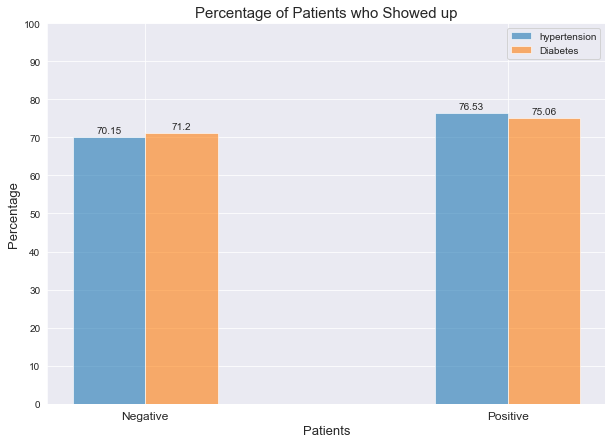

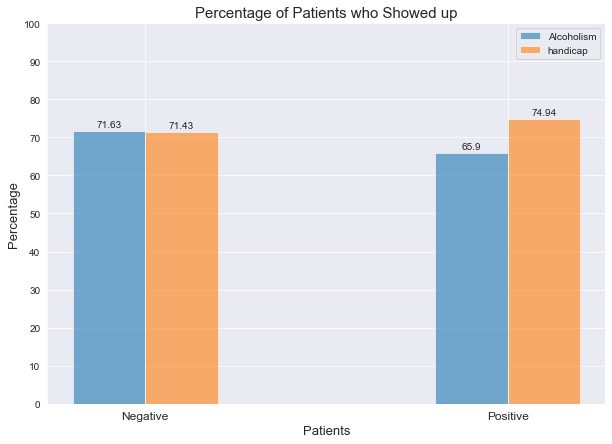

In [296]:

# Create two axes and two figures.
fig1, ax1 = plt.subplots(figsize=(10,7))
fig2, ax2 = plt.subplots(figsize=(10,7))

#  bar charts of patients for hypertension and diabtes
hypertension_bar = ax1.bar(bar-width/2, hypertension, width, label="hypertension", alpha=0.6)
diabetes_bar  =ax1.bar(bar+width/2, diabetes, width, label= "Diabetes",alpha=0.6)

#  bar charts of patients for alcoholism and handicap
alcoholism_bar = ax2.bar(bar-width/2, alcoholism, width, label="Alcoholism",alpha=0.6)
handicap_bar = ax2.bar(bar+width/2, handicap, width, label="handicap",alpha=0.6)

# Adding the percentage values to the top of the bars for easy access.
ax1.bar_label(hypertension_bar, padding=2)
ax1.bar_label(diabetes_bar, padding=2)
ax2.bar_label(alcoholism_bar, padding=2)
ax2.bar_label(handicap_bar, padding=2)


# Setting title
ax1.set_title("Percentage of Patients who Showed up", fontsize=15)
ax2.set_title("Percentage of Patients who Showed up", fontsize=15)

# Setting ticks on x-axis.
ax1.set_xticks(bar)
ax2.set_xticks(bar)

# Setting ticks on y-axis
ax1.set_yticks(ytick)
ax2.set_yticks(ytick)

#Setting tick labels on x-axis.
ax1.set_xticklabels(xlabel, fontsize=12)
ax2.set_xticklabels(xlabel, fontsize=12)


# Setting x-axis labels
ax1.set_xlabel("Patients", fontsize=13)
ax2.set_xlabel("Patients", fontsize=13)

# Setting y-axis label
ax1.set_ylabel("Percentage", fontsize=13)
ax2.set_ylabel("Percentage", fontsize=13)

# legend
ax1.legend()
ax2.legend()

# Show the visualisaion
plt.show()

#### Observation:

From the above charts, I observe that the bars on the right side(positive) are higher than those on the left(negative).

Since the negative label represents patients that not suffering from the ailment and positive label represent patients that suffering from a certain ailment.

This means patients with such ailment are more likely to show up for their appointments than patients who are not suffering from the ailments.

An exception is the alcoholism patients. It appears non-alcoholic patients show up for their appointments than patients that have alcohol tendency.

From the bar chart, more patients suffering from hypertension showed up more(At 76.53% rate) than any other patients.
while patients who have alcohol tendency showed up the least(At 65.9% rate).

#### Observation:

A Higher percentage of non-alcoholic patients showed up for their appointments than Alcoholic patients
71.63 percent Against 65.9 percent.

### Research Question 5

####  Does sending reminder to patients increase the chances of showing up for their appointments?

In this section, I will first check if the number of reminders increase the number of show up.
Next, I will check how reminder can have an impact on patients with certain disease.

In [297]:
# Total number of patients who received a reminder.
#  Note that 1 means that a reminder was sent.
# While 0 means that no reminder was sent.

df["reminder"].value_counts()

0    36402
1    35435
Name: reminder, dtype: int64

#### Observation: 

The total number of patients who received a reminder is 35,435 patients. Almost half of the total patients in the cleaned dataset received a reminder.


#### Note:

Next, I'll find the total percentage of patients who received a reminder and those that didn't but showed up for their appointments.
I'll do this by finding the mean value of the show_up column by reminder.
I will then take the percentage and round it up to two decimal places with **Numpy** round() function.

In [298]:
# The Average and Average percentage of patients who received/didn't receive a reminder and showed up
reminder = np.round(df.groupby("reminder")["show_up"].mean() *100, 2)
reminder

reminder
0    70.58
1    72.41
Name: show_up, dtype: float64

#### Note:

Following is the bar chart showing the percentage of patients who received a reminder and those that did not.

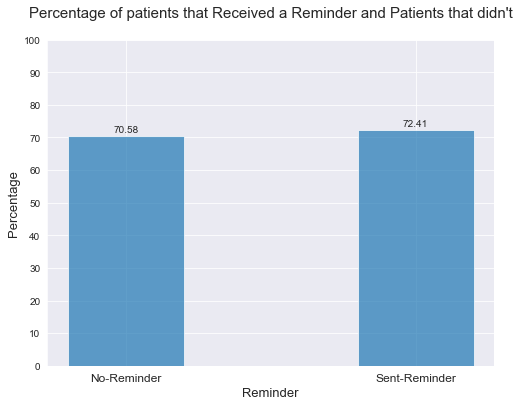

In [299]:
# Use numpy to get a range of values for the ticks of x-axis
bar = np.arange(len(reminder))

# Use numpy to get the tick values of y-axis in percentage.
ytick = np.arange(0,110,10)

# labels for the tick values of x axis.
    # No-Reminder means reminder was sent.
    # Sent-Reminder means no reminder was sent.
xlabels = ["No-Reminder", "Sent-Reminder"]

# Shape of bar chart.
plt.figure(figsize=(8,6))

# Plot bar chart.
plt.bar(bar, reminder, width= 0.4, alpha=0.7)

# Title for the bar chart.
plt.title("Percentage of patients that Received a Reminder and Patients that didn't\n", fontsize=15)

# Set tick values for x-axis.
plt.yticks(ytick)

# Set tick values for x-axis.
plt.xticks(bar, xlabels, fontsize=12)

# Set labels  for both x and y axis.
plt.xlabel("Reminder", fontsize=13)
plt.ylabel("Percentage", fontsize=13)


# Call function to add percentage values to the top of the bar chart.
addlabel(bar, reminder)

# Display chart.
plt.show()

#### Observation:

In the above code, I found that 72.41% of patients who received a reminder showed up for their appointments.
While 70.58 perecnt of patients who didn't receive a reminder showed up.

That's not a big difference.
The reminder might have only increase the show-up rate by about 2%. 

In the next set of codes, I will narrow the exploration and consider patients suffering from a certain disease.
I will find out how receiving a reminder might make them show up.

#### Note:

Following is the Average percentage of hypertension and non-hypertension patients who showed up for their appointments that either receive a reminder or not.
After, I will take the visualisation of the findings on a bar chart.

In [300]:
# The average percentage of hypertension and non-hypertension patients who showed up that either receive a reminder or not
# I will then use numpy to round up the result to two decimal places.


# rem_hyper stands for the percentage value of  hypertension and non-hypertension patients who showed up that either receive a reminder or not
df.groupby(["reminder", "hypertension"])["show_up"].mean()
rem_hyper = np.round(df.groupby(["reminder", "hypertension"])["show_up"].mean() * 100, 2)
rem_hyper

reminder  hypertension
0         0               69.11
          1               75.69
1         0               71.19
          1               77.52
Name: show_up, dtype: float64

In [301]:
# no_reminder represents non-hypertension patients who didn't receive a reminder.
no_reminder = rem_hyper[0]

# sent_reminder represents non-hypertension patients who receive a reminder.

sent_reminder = rem_hyper[1]
no_reminder, sent_reminder

(hypertension
 0    69.11
 1    75.69
 Name: show_up, dtype: float64,
 hypertension
 0    71.19
 1    77.52
 Name: show_up, dtype: float64)

#### Note:

Following is a bar chart showing the visualisation of the above data.

Please, note that **Positive** on the x-axis label represents Patients suffering from hypertension and
**Negative** represents patients who have no hypertension.

In [302]:
# Use numpy to get a range of numbers for the tick values of x-axis.
bar = np.arange(len(no_reminder))
bar
# width of the bars.
width= 0.2

# label for the tick values of x-axis.
xlabel = ["Negative", "Positive"]

# tick values of the y-axis.
# I use 0 to 100 as the tick values to depict percentage values.
ytick = np.arange(0,110,10)

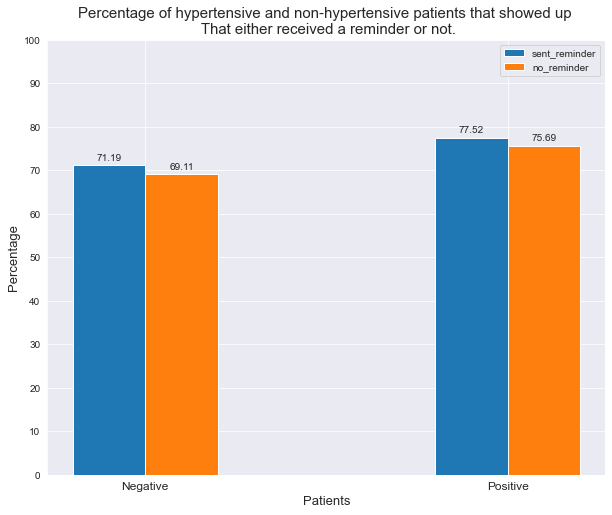

In [303]:

# Create a figure and axis for the bar chart.
fig, ax = plt.subplots(figsize=(10,8))

# plot bar charts.
sent_reminder_bar = ax.bar(bar-width/2, sent_reminder, width, label="sent_reminder")
no_reminder_bar = ax.bar(bar+width/2, no_reminder, width, label="no_reminder")

# Add corresponding percentage values to the top of the bars.
ax.bar_label(sent_reminder_bar, padding=3)
ax.bar_label(no_reminder_bar, padding=3)

# Set title
ax.set_title("Percentage of hypertensive and non-hypertensive patients that showed up \n That either received a reminder or not.", fontsize=15)

# Set labels for x and y axis.
ax.set_xlabel("Patients",fontsize=13)
ax.set_ylabel("Percentage", fontsize=13)

# Set tick values for both x and y-axis.
ax.set_xticks(bar)
ax.set_yticks(ytick)

# Set label for the tick values of x-axis.
ax.set_xticklabels(xlabel,fontsize=12)

# Show legend.
plt.legend()

# Display bar chart.
plt.show()

In [304]:
rem_hyper

reminder  hypertension
0         0               69.11
          1               75.69
1         0               71.19
          1               77.52
Name: show_up, dtype: float64

### Observation:

I observe that reminder increased the rate at which patients showed up for their appointments by around 2%.
Same impact for those hypertension and non-hypertension patient. 

#### Note:

Next, I will move to find the average percentage of diabetes and non-diabetes patients who showed up and either received a reminder or not.

I will then show my findings on a bar chart.

In [305]:
# The average percentage of diabetic and non-diabetic patients who showed up and either received a reminder or not.
# Use Numpy to round result to two decimal places.

rem_dia =np.round(df.groupby(["reminder", "diabetes"])["show_up"].mean() * 100, 2)
rem_dia

reminder  diabetes
0         0           70.30
          1           73.63
1         0           72.10
          1           76.89
Name: show_up, dtype: float64

In [306]:
# Percentage of patients who received a reminder for both diabetic and non-diabetic patients and showed up.
sent_reminder_dia =rem_dia[1]
sent_reminder_dia

diabetes
0    72.10
1    76.89
Name: show_up, dtype: float64

In [307]:
# Percentage of patients who didn't  receive a reminder for both diabetic and non-diabetic patients but showed up.
no_reminder_dia =rem_dia[0]
no_reminder_dia

diabetes
0    70.30
1    73.63
Name: show_up, dtype: float64

In [308]:
# Import numpy library to get the ticks of the x-axis

bar = np.arange(len(sent_reminder_dia))
bar

array([0, 1])

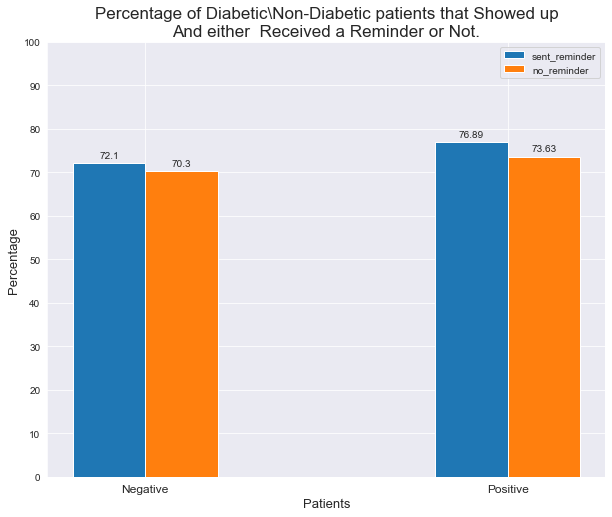

In [309]:
# create figure and axis to plot the bar chart.
fig, ax = plt.subplots(figsize=(10,8))

# bar chart showing percentage of Diabetes and non-diabetes patients who received a reminder and those that didn't

# sent_reminderDia represents bar chart of diabetic/non-diabetic patients who received a remender.
sent_reminderDia_bar = ax.bar(bar-width/2, sent_reminder_dia, width, label="sent_reminder")

# no_reminderDia represents bar chart of diabetic/non-diabetic patients who didn't received a remender.
no_reminderDia_bar = ax.bar(bar+width/2, no_reminder_dia, width, label="no_reminder")

# value label of the bars
ax.bar_label(sent_reminderDia_bar, padding=3)
ax.bar_label(no_reminderDia_bar, padding=3)

# Set title
ax.set_title("Percentage of Diabetic\\Non-Diabetic patients that Showed up\nAnd either  Received a Reminder or Not.", fontsize=17)

#Set x and y axis label
ax.set_xlabel("Patients",fontsize=13)
ax.set_ylabel("Percentage", fontsize=13)

#Set x and y axis tick
ax.set_xticks(bar)
ax.set_yticks(ytick)

# Set tick label for x axis.
ax.set_xticklabels(xlabel,fontsize=12)

# Show legend
plt.legend()

# Display chart
plt.show()

#### Observation:

I observe that reminder increased the rate at which diabetic/non-diabetic patients showed up for their appointments by around 2% to 3%. 

Non-diabetic patients showed up more when they received a reminder by 2 percent while diabetic patients showed up more when they received a reminder. The increase is by 3 percent.

#### Note:

Next, I will seek to find the average percentage of alcoholic and non-alcoholic patients who showed up and either received a reminder or not.

I will then show my findings on a bar chart.

In [310]:
# The percentage average of alcoholism and non-alcoholism patients who showed up and either received a reminder or not.
# Use Numpy to round up result to two decimal places.

rem_alc=  np.round(df.groupby(["reminder", "alcoholism"])["show_up"].mean() * 100, 2)

rem_alc

reminder  alcoholism
0         0             70.74
          1             64.71
1         0             72.54
          1             67.26
Name: show_up, dtype: float64

In [311]:
# Percentage of patients who received a reminder for both Alcoholic and  and non-alcoholic patients
sent_reminder_alc = rem_alc[1]

# Percentage of patients who received a reminder for both Alcoholic and  and non-alcoholic patients

no_reminder_alc =  rem_alc[0]

In [312]:
no_reminder_alc

alcoholism
0    70.74
1    64.71
Name: show_up, dtype: float64

In [313]:
sent_reminder_alc

alcoholism
0    72.54
1    67.26
Name: show_up, dtype: float64

#### Note:

Following are the codes that plot the percentage values on a bar chart.

In [314]:
# Use numpy to get the tick values of x-axis 
bar = np.arange(len(sent_reminder_alc))

# Use Numpy to get the tick values for y axis. Note that values are in percentage.
ytick = np.arange(0,110,10)
ytick

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

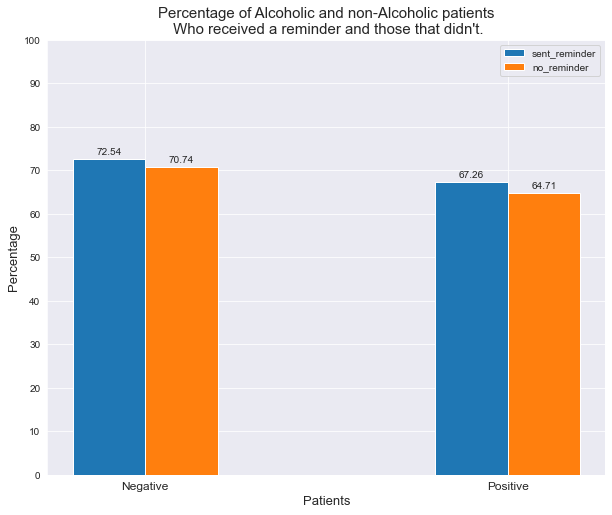

In [315]:
# Create a figure and axis where the bar chart will be plotted.
fig, ax = plt.subplots(figsize=(10,8))

# bar chart showing percentage of alcoholic and non-alcoholic patients who received a reminder and those that didn't
sent_reminderAlc_bar = ax.bar(bar-width/2, sent_reminder_alc, width, label="sent_reminder")
no_reminderAlc_bar = ax.bar(bar+width/2, no_reminder_alc, width, label="no_reminder")

# Place percentage values on top of the bars.
ax.bar_label(sent_reminderAlc_bar, padding=3)
ax.bar_label(no_reminderAlc_bar, padding=3)

# Set title
ax.set_title("Percentage of Alcoholic and non-Alcoholic patients\n Who received a reminder and those that didn't.", fontsize=15)

#Set x and y axis label
ax.set_xlabel("Patients",fontsize=13)
ax.set_ylabel("Percentage", fontsize=13)

#Set x and y-axis tick
ax.set_xticks(bar)
ax.set_yticks(ytick)

# Set tick label for x axis.
ax.set_xticklabels(xlabel,fontsize=12)

# Show legend
plt.legend()

# Display chart
plt.show()

In [316]:
rem_alc

reminder  alcoholism
0         0             70.74
          1             64.71
1         0             72.54
          1             67.26
Name: show_up, dtype: float64

#### Observation:

I observe that reminder increased the rate at which non-alcoholic patients showed up for their appointments by around 2%. 

Unusually, the show up rate dropped by 3% for  alcoholic patients.

#### Note:

Next, I will seek to find the average percentage of handicapped and non-handicapped patients who showed up and either received a reminder or not.

I will then show my findings on a bar chart.

In [317]:
# The percentage average of handicap and non-handicapped patients who showed up and either received a reminder or not.
# Use numpy to round up the value to two decimal places.

rem_handicap = np.round(df.groupby(["reminder", "handicap"])["show_up"].mean() * 100, 2)
rem_handicap

reminder  handicap
0         0           70.48
          1           75.43
1         0           72.39
          1           74.23
Name: show_up, dtype: float64

In [318]:
# Percentage average of handicapped/non-handicapped patients who was sent a reminder.
sent_reminder_handicap = rem_handicap[1]

# Percentage average of handicapped/non-handicapped patients who didn't receive a reminder.
no_reminder_handicap = rem_handicap[0]

In [319]:
no_reminder_handicap

handicap
0    70.48
1    75.43
Name: show_up, dtype: float64

In [320]:
sent_reminder_handicap

handicap
0    72.39
1    74.23
Name: show_up, dtype: float64

#### Note:

Following are the codes that plot the percentage values on a bar chart.

In [321]:
#Use the previous value of ytick and and xtick(bar) in declared previously

ytick
bar

array([0, 1])

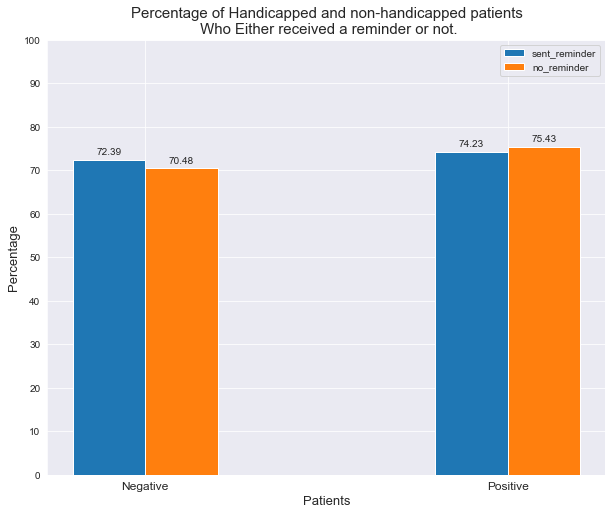

In [322]:
# shape of bar chart.
fig, ax = plt.subplots(figsize=(10,8))

# bar chart showing percentage of handicapped and non-handicapped patients who either received a reminder or not.
sent_reminderHc_bar = ax.bar(bar-width/2, sent_reminder_handicap, width, label="sent_reminder")
no_reminderHc_bar = ax.bar(bar+width/2, no_reminder_handicap, width, label="no_reminder")

# Place percentage values on top of the bars
ax.bar_label(sent_reminderHc_bar, padding=3)
ax.bar_label(no_reminderHc_bar, padding=3)

# Set title
ax.set_title("Percentage of Handicapped and non-handicapped patients\n Who Either received a reminder or not.", fontsize=15)

#Set x and y axis label
ax.set_xlabel("Patients",fontsize=13)
ax.set_ylabel("Percentage", fontsize=13)

#Set x and y axis tick
ax.set_xticks(bar)
ax.set_yticks(ytick)

# Set tick label for x axis.
ax.set_xticklabels(xlabel,fontsize=12)

# Show legend
plt.legend()

# Display chart
plt.show()

In [323]:
rem_handicap

reminder  handicap
0         0           70.48
          1           75.43
1         0           72.39
          1           74.23
Name: show_up, dtype: float64

#### Observation:

I observe that reminder increased the rate at which non-handicapped patients showed up for their appointments by around 2%.

Unusually, the show up rate dropped by 1% for handicapped patients.

### Research Question 6

#### Is long waiting time the reason patients didn't show up for their appointment?


In this section, we will explore the waiting hour column and find if there is any correlation with those that showed up and those that didn't show up for their appointments in respect to the number of hours they waited before appointment day.

In [324]:
# The average waiting hours of patients that showed up for their appointments.
# Use numpy to round to two decimal places.

df["waiting_time"][show].mean()
avg_hour_present = np.round(df["waiting_hour"][show].mean())

avg_hour_present

348.0

In [325]:
# The average waiting hours of patients that refuse to show up for their appointments.
# Use numpy to round to two decimal places.

df["waiting_time"][not_show].mean()

avg_hour_absent = np.round(df["waiting_hour"][not_show].mean())
avg_hour_absent

401.0

#### Observation:

I observe from the above result that patients who didn't show up for their appointments waited a bit longer than patients that showed up.
348 hours vs 401 hours on average.

Can long waiting time be the reason patients didn't show up for their appointments?

The numbers are close. I cant't draw anything from that yet.
I'll explore more in the following cells to see the distribution of the waiting hours of patients who showed up and patients who didn't show up for their appointments.

Again, note that **Absent** represents patients who didn't show up for their appointment.

While **Present** represents patients who showed up for their appointment in the label of the chart.

In [326]:
# values of the bars
value = [avg_hour_absent, avg_hour_present]

# use numpy to get a range of value for the tick values of x-axis.
bar = np.arange(len(value))

#  label of the tick value of x-axis.
xlabel = ["Absent", "Present"]

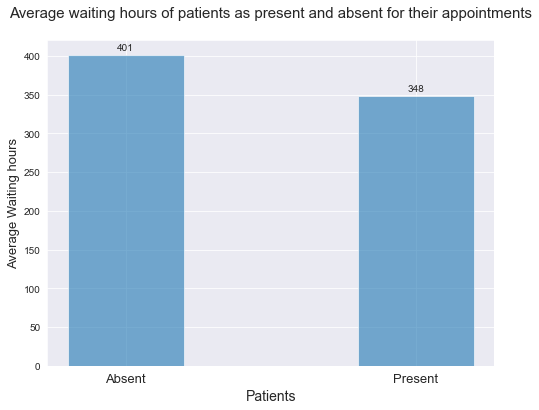

In [327]:
# shape of the bar chart.
plt.figure(figsize=(8,6))

# Bar chart for average waiting hours of patients as present and absent for their appointments
waiting_hour_average = plt.bar(bar, value, width=0.4, alpha=0.6)

# Put the values on top of the bar chart.
plt.bar_label(waiting_hour_average, padding=3)

# Bar chart Title
plt.title("Average waiting hours of patients as present and absent for their appointments\n", fontsize=15)

# label of x-axis
plt.xlabel("Patients", fontsize=14)

# label of y-axis
plt.ylabel("Average Waiting hours", fontsize=13)

# label of the ticks of x axis
plt.xticks(bar, xlabel, fontsize=13)

# Display bar chart.
plt.show()


#### Observation:
 
 The above bar chart lends credence to the fact that more patients who are absent for their appointment had a longer waiting time than those who are present.

#### Note:

I will explore this more by showing the distribution of the waiting hours of patients who showed up for their appointments and those that didn't in the entire dataset.

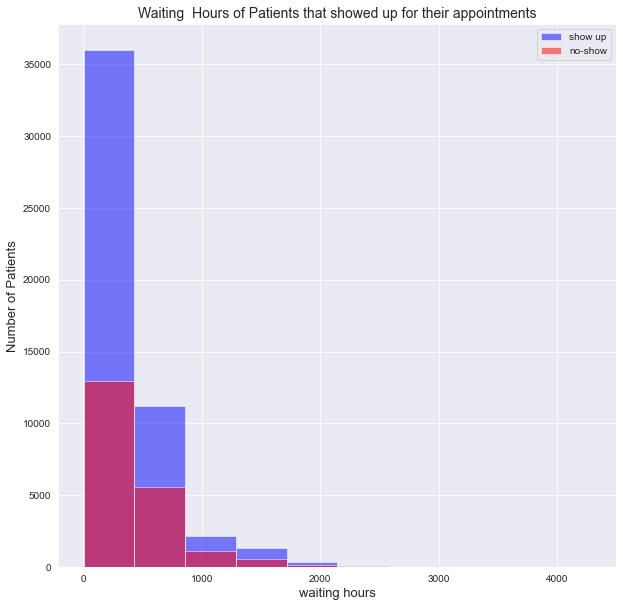

In [328]:
# The distribution of the waiting hours of patients who showed up for their appointments and those that didn't.

# Histogram distribution of the waiting hours of patients that showed up.
df["waiting_hour"][show].hist(label = "show up", figsize=(10,10), color="blue", alpha=0.5) 


# Histogram distribution of the waiting hours of patients that didn't showed up.
df["waiting_hour"][not_show].hist(label="no-show", figsize=(10,10), color="red", alpha=0.5)

# Set title 
plt.title("Waiting  Hours of Patients that showed up for their appointments", fontsize=14)

# Set label for x a-axis.
plt.xlabel("waiting hours", fontsize=13)

# Set label for y a-axis.
plt.ylabel("Number of Patients", fontsize=13)

# Show legend
plt.legend()

# Display histogram distribution.

plt.show()

#### Observation:
From the distribution, I observe that there is no strong correlation between the waiting hours of patients that showed up and those that didn't.
The waiting hours may not be the reason patients showed up and didn't.

Both patients waiting hours are almost close. their spread covers the same area on the histogram.
No surprises that the waiting hours for those that showed up is thicker and has higher frequency values on the histogram. 
Of course, More patients showed up in the dataset than patients that didn't. I have shown this in the previous explorations.

I must also mention that both histogram are skewed to the right. They both have the same maximum value. This is unclear in the histogram because they both have little number of patients, especially for the value of the waiting hours for those who didn't show up.
In the next cell, I'll show that they both have the same highest values.

In [329]:
# Maximum waiting hour for patients who showed up for their appointments.
df["waiting_hour"][show].max()

4285.0

In [330]:
# Maximum waiting hour for patients who didn't show up for their appointments.

df["waiting_hour"][not_show].max()

4285.0

In [331]:
#The maximum values of the waiting hours of those that show up and didn't show up for their appointments
print("Maximum values of waiting hours for both patients who showed up and those that didn't:")

df["waiting_hour"][show].max(), df["waiting_hour"][not_show].max()

Maximum values of waiting hours for both patients who showed up and those that didn't:


(4285.0, 4285.0)

<a id='conclusions'></a>
### Conclusions





In my explorations, I found that there is no much difference between the age of patients that showed up and those that didn't. However, on average, patients who showed up  for their appointments are five year older than patients who didn't show up.



There is almost no difference between the total percentage of both genders that showed up for their appointments.
The female gender showed up 71.6% on average while the male showed up 71.3% on average.



On exploring the free_health_care variable, I found that patients who do not enjoy free medical aid showed up more than patients who have access to free medical aid. They showed up at 7% rate on average more than patients who have access to free medical aid.

Lack of funds for medical care may not be the reason patients didn't show up for their appointments. Although, I can't conclude absolutely on this as there may be other factors that contribute to that which I didn't consider in my exploration.


Could it be that some patients who have access to free medical care seem not to take their appointment serious because they are not paying for their bill? 
I can't tell precisely as my analysis is limited to few variables and I didn't carry out my analysis with inferential statistics or machine learning.



I also found out that more patients suffering from hypertension showed up for their appointments than patients who has no hypertension at a 6 percent rate.

Patients suffering from diabetes showed up for their appointments 4 percent more than patients who are not diabetic. Similarly, handicapped patients also showed up for their appointments 3% more than patients who are not handicapped.



The patients suffering from one ailments or the other provided in the dataset showed up more for their appointments more than patients who are not suffering from the ailment. However, an exception are patients who have alcoholism tendency.

Patients who have no alcoholic tendency appear to show up more for their appointment than alcoholic patients by around 6%.

hypertension patients tend to show up than any other patients in the dataset.They showed up for their appointment at 76.53% rate while alcoholic patients tend to show up the least for their appointments. They showed up at only 66% rate.



I explore how patients suffering from a certain ailments showed up for their appointment, considering whether they received a reminder or not. 
Generally speaking, I found that reminder increased the rate at which patients showed up for their appointments by 2% rate on average.
It's not a big difference though.


I found that reminder increased the rate at which both hypertensive and non-hypertensive patients showed up for their appointments by around 2%. Similar thing occured for diabetic and non-diabetic patients. The increase was around 2 to 3% rate on average. 



Contrarily, I found a different situation for the alcoholism and handicap variable. I found that when they received a reminder, the rate at which they showed up dropped but their show up rate  went up when they didn't receive a reminder.
Can it be that they don't care about their health when they are reminded?
I could not establish from this analysis that their show up rate dropped because they received a reminder.
Establishing that is beyond the scope of this analysis.


Lastly, I found out that patients who didn't show up for their appointments waited a bit longer than patients that showed up. 348 hours vs 401 hours on average for the patients. That's over two days difference.
I must mention that my analysis could not establish if this difference was the reason they didn't show up for their appointments.



I must mention that even though I found that some patients tend to show up for their appointments when they received a reminder, There might be other factors that make them show up which I didn't consider in my analysis.
Similarly, I could not conclude absolutely that patients showed up or didn't show up because of one ailments or the other.

I must also mention that I didn't consider patients who had more than one ailment. I didn't analyse all of the variables in the dataset with one another, hence I cannot be absolute in my judgement. 
It may require some advanced data analytic processes such as inferential statistics or machine learning to come out with absolute judgement.